# Training perceptron with numpy

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data normalization

In [4]:
def normalize(dataset):
    return ((dataset-dataset.min())/(dataset.max()-dataset.min()))

Verity convergence function

In [5]:
def convergence(x,w,y):
    y_hat = np.matmul(x,w.T)
    y_hat = np.piecewise(y_hat, [(y_hat < 0),(y_hat >= 0)], [0, 1])
    return np.sum((y_hat-y)) == 0

Prepare data

In [6]:
data = pd.read_csv("data.csv")
data['x1'] = normalize(data['x1'])
data['x2'] = normalize(data['x2'])
data['ones'] = 1
y = np.array(data[['label']]).T
completeData = np.array(data[['x1','x2','ones']])

Training function

In [7]:
def training(lr):
    w = np.random.normal(0, 0.1, (1,3))
    while True:
        element = data.sample()
        labelValue = element['label'].values[0]
        x = np.array(element[['x1','x2','ones']])
        if(labelValue == 1 and np.dot(w,x.T) < 0):
            w = w + x*lr
        elif(labelValue == 0 and np.dot(w,x.T) >= 0):
            w = w - x*lr
        if(convergence(completeData,w,y)):
            return (w)

Get weights and graph results to verify the correct separation of the data

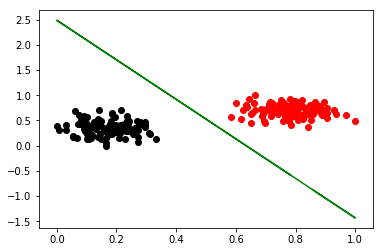

In [8]:
weights = training(0.1)

label_0 =data.where(data['label']==0).dropna()
label_1 =data.where(data['label']==1).dropna()
fig, ax = plt.subplots()
x2y =  (-weights[0][0]*completeData[:,0] - weights[0][2])/weights[0][1]
ax.plot(completeData[:,0],x2y,color="green")
ax.scatter(label_1['x1'],label_1['x2'],color="red")
ax.scatter(label_0['x1'],label_0['x2'],color="black")